<a href="https://colab.research.google.com/github/anthonymelson/portfolio/blob/master/Balto_Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving data_scientist_take_home_assignment_final_modified.csv to data_scientist_take_home_assignment_final_modified.csv


In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(data_to_load['data_scientist_take_home_assignment_final_modified.csv']))

## Data Cleaning and Exploratory Analysis

Look at head of data to get better idea of what it is and what to expect.

In [ ]:
df.head()

,Rep ID,Start Time,End Time,Difference,Checklist - Why are you interested in one of our insurance policies today?,Checklist - What sparked your interest in insurance at this time?,Checklist - Has anything changed in your living situation since your last policy got started?,Checklist - What's most important to you in an insurance company?,Checklist - Why didn't you move forward with the last quote you received?,Checklist - What would you like to change about your current insurance coverage?,"Checklist - What do you find most important: price, coverarge, or something else?",Checklist - What do you most dislike about your current insurance?,Checklist - Have you worked with other insurance companies before--what was that like?,Checklist - Please confirm for me that you want to apply for an insurance policy today with us.,Postcall - communication skills - active listening,Postcall - communication skills - agent expressed appreciation,Postcall - communication skills - agent proactivity,Postcall - communication skills - customer compliment,Postcall - communication skills - customer expressed appreciation,Postcall - communication skills - empathy,Postcall - communication skills - justification,Postcall - communication skills - urgency,QuoteCount,SoldCount,Comp_Rate
0,662,4:29:00 PM,4:41:00 PM,12.0,0,1,0,1,1,0,0,0,0,0,1,0,2,0,1,0,6,1,1,0,0.3
1,387,4:32:00 PM,4:56:00 PM,24.0,0,1,0,0,0,0,1,0,0,1,1,21,10,0,1,1,11,2,0,0,0.2
2,662,5:02:00 PM,5:19:00 PM,17.0,0,1,0,0,0,0,0,0,0,0,0,0,4,0,2,0,1,0,1,0,0.1
3,662,6:13:00 PM,6:39:00 PM,26.0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,7,1,1,0,1,0,0.1
4,387,6:45:00 PM,6:48:00 PM,3.0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0.0


Check for missing values.

In [ ]:
df.isna().sum()

Rep ID                                                                                             0
Start Time                                                                                         0
End Time                                                                                           0
Difference                                                                                         0
Checklist - Why are you interested in one of our insurance policies today?                         0
Checklist - What sparked your interest in insurance at this time?                                  0
Checklist - Has anything changed in your living situation since your last policy got started?      0
Checklist - What's most important to you in an insurance company?                                  0
Checklist - Why didn't you move forward with the last quote you received?                          0
Checklist - What would you like to change about your current insurance coverage?           

No missing values.  Now check data types.

In [ ]:
df.dtypes

Rep ID                                                                                               int64
Start Time                                                                                          object
End Time                                                                                            object
Difference                                                                                         float64
Checklist - Why are you interested in one of our insurance policies today?                           int64
Checklist - What sparked your interest in insurance at this time?                                    int64
Checklist - Has anything changed in your living situation since your last policy got started?        int64
Checklist - What's most important to you in an insurance company?                                    int64
Checklist - Why didn't you move forward with the last quote you received?                            int64
Checklist - What would you like to ch

### Checking Correlations at the Call Level

Everything appears to be in order.  Now look at everything correlated with quote count and sale count, respectively.

In [ ]:
df.corr()['QuoteCount']

Rep ID                                                                                             0.012400
Difference                                                                                         0.092753
Checklist - Why are you interested in one of our insurance policies today?                         0.160270
Checklist - What sparked your interest in insurance at this time?                                  0.365355
Checklist - Has anything changed in your living situation since your last policy got started?      0.067566
Checklist - What's most important to you in an insurance company?                                  0.191822
Checklist - Why didn't you move forward with the last quote you received?                          0.229868
Checklist - What would you like to change about your current insurance coverage?                   0.140464
Checklist - What do you find most important: price, coverarge, or something else?                  0.153063
Checklist - What do you most

It stands out that SoldCount and QuoteCount are moderately positively correlated (~ 0.51), which makes sense (as one must be given a price to purchase), and that Comp_Rate (completion rate of the checklist) has a low to moderate strength positive correlation with QuoteRate (~ 0.39).

These two correlations are a sketch of a narrative: Completing the question checklist leads to more quotes, and more quotes lead to more sales.

In [ ]:
df.corr()['SoldCount']

Rep ID                                                                                            -0.039028
Difference                                                                                         0.086659
Checklist - Why are you interested in one of our insurance policies today?                         0.028819
Checklist - What sparked your interest in insurance at this time?                                  0.107256
Checklist - Has anything changed in your living situation since your last policy got started?      0.022321
Checklist - What's most important to you in an insurance company?                                  0.023499
Checklist - Why didn't you move forward with the last quote you received?                          0.098960
Checklist - What would you like to change about your current insurance coverage?                   0.114674
Checklist - What do you find most important: price, coverarge, or something else?                  0.029033
Checklist - What do you most

Somewhat surprisingly, sales are not correlated with checklist completion rate.

### Checking Correlations at the User Level



Check for variables correlated with sales and quotes by employee mean values.  This will indicate how employee's habits affect their outcomes (i.e. do employees who ask more checklist questions on average, get more sales on average).  This should be especially telling, as sales is a "numbers game", which means that general behaviors pay-off in the long run more than specific actions constantly cause specific reactions.

In addition, using the mean allows for the closing question (final question on the checklist) to be analyzed as a rate ("win rate" as it is commonly called at Balto).

In [ ]:
df_employee_mean = df.groupby('Rep ID').mean() # Means of each feature accross calls for each employee

In [ ]:
df_employee_mean.corr()['SoldCount']

Difference                                                                                        -0.190141
Checklist - Why are you interested in one of our insurance policies today?                        -0.246270
Checklist - What sparked your interest in insurance at this time?                                 -0.420381
Checklist - Has anything changed in your living situation since your last policy got started?     -0.012730
Checklist - What's most important to you in an insurance company?                                 -0.581099
Checklist - Why didn't you move forward with the last quote you received?                         -0.132076
Checklist - What would you like to change about your current insurance coverage?                  -0.076127
Checklist - What do you find most important: price, coverarge, or something else?                 -0.438373
Checklist - What do you most dislike about your current insurance?                                -0.034225
Checklist - Have you worked 

Surprisingly, employee's averages for quotes and sales are negatively correlated.

Importantly, there are several strong negative correlations between specific questions and sales, and a very strong positive correlation (~0.91) between sales and the final question average ('win rate').

The question is: "Checklist - Please confirm for me that you want to apply for an insurance policy today with us."

This is clearly question that is only asked to close deals, making it very significant to sales.

In [ ]:
df_employee_mean.corr()['QuoteCount']

Difference                                                                                         0.360233
Checklist - Why are you interested in one of our insurance policies today?                         0.242771
Checklist - What sparked your interest in insurance at this time?                                  0.728509
Checklist - Has anything changed in your living situation since your last policy got started?     -0.057409
Checklist - What's most important to you in an insurance company?                                  0.603228
Checklist - Why didn't you move forward with the last quote you received?                          0.344246
Checklist - What would you like to change about your current insurance coverage?                  -0.088659
Checklist - What do you find most important: price, coverarge, or something else?                  0.400730
Checklist - What do you most dislike about your current insurance?                                 0.358519
Checklist - Have you worked 

Here, many significant details emerge.  First, the questions that were negatively correlated with sale rates are positively correlated with quote rates (one as high as ~ 0.72).  Additionally, the 'win rate' is moderately to strongly negatively correlated (~ -0.61) with quote rates, which is also a sign reversal.

There is clearly a pattern of sign reversal.

In [ ]:
df_employee_mean.corr()['Checklist - Please confirm for me that you want to apply for an insurance policy today with us.']

Difference                                                                                        -0.219534
Checklist - Why are you interested in one of our insurance policies today?                        -0.273623
Checklist - What sparked your interest in insurance at this time?                                 -0.418633
Checklist - Has anything changed in your living situation since your last policy got started?     -0.150593
Checklist - What's most important to you in an insurance company?                                 -0.532254
Checklist - Why didn't you move forward with the last quote you received?                         -0.236830
Checklist - What would you like to change about your current insurance coverage?                   0.039625
Checklist - What do you find most important: price, coverarge, or something else?                 -0.364328
Checklist - What do you most dislike about your current insurance?                                -0.080717
Checklist - Have you worked 

This information is technically redundant, but was implied as being needed--so it was added.

### Remarks About EDA

The relationships at the user level and call level are portraying a similar narrative: questions lead to quotes and quotes to sales, but the relationships at the user level are stronger.  Additionally, the user level gives insight as to what reps can do on a regular basis (approaches and habits) to increase overall sales.  For these two reasons, the analysis and presentation will focus on the user level.

The first question that needs to be answered is whether this system can be treated as multiple states (i.e. call, quote, sale).  The function below will check if there are any instances of a sale without a quote.  If there aren't any, it is fair to consider call, quote, and sale as linearily ordered states (meaning that the call must become a quote and the quote in, in turn, a sale).

In [ ]:
sold_no_quote = []

for i in range(len(df)):
  if df['SoldCount'][i] == 1 and df['QuoteCount'][i] == 0:
      sold_no_quote.append(1)
len(sold_no_quote)

0

The result shows that these are linearily connected states.  The significance is that the question shifts from what is merely correlated with one or the other, to a question of what raises the probability of transition from one state to the another (i.e from call to quote, then from quote to sale).

This fact also gives explaination as to why the signs on the correlation values are reversed for sales and quotes (respectively) despite the fact that they are correlated.  This seems to result from the change of state.

# What Can Reps Do to Raise the Probability that they will Transition from a call to a Quote (i.e. Raise their Quote Rates)?

First, we can bring back our user level mean correlations for quotes vs other variables.  Since all of these started in the call state, those that are positively correlated with quotes likely increase the probability, and vice versa for those with negative correlations.

In [ ]:
df_employee_mean.corr()['QuoteCount']

Difference                                                                                         0.360233
Checklist - Why are you interested in one of our insurance policies today?                         0.242771
Checklist - What sparked your interest in insurance at this time?                                  0.728509
Checklist - Has anything changed in your living situation since your last policy got started?     -0.057409
Checklist - What's most important to you in an insurance company?                                  0.603228
Checklist - Why didn't you move forward with the last quote you received?                          0.344246
Checklist - What would you like to change about your current insurance coverage?                  -0.088659
Checklist - What do you find most important: price, coverarge, or something else?                  0.400730
Checklist - What do you most dislike about your current insurance?                                 0.358519
Checklist - Have you worked 

Three things stand out:

1. Reps' completion rates are moderately to strongly positively correlated (~ 0.64) with quote rate.

2. Three questions (all of which are "value questions" are positively correlated with quote rate: 

    What sparked your interest in insurance at this time? (~ 0.72)

    What's most important to you in an insurance company? (~ 0.60)

    What do you find most important: price, coverarge, or something else? (~0.40) 

3. Active listening and customer exressed appreciation are both positively correlated with quote rates.

This suggests that asking more questions (specifically those listed) and actively listening can help the reps to increase their quote rates.  However, these correlations need to be more closely examined before they can be trusted.

## A Closer Look at the Possible Actions for Increasing Quote Rates

First, a quick renaming of some of the labels for the sake of plotting and clarity.  Many will be called something-rate as everything moving forward will be at the user level and thus be a mean (rate).

In [ ]:
names = []
check_count = 1
post_count = 1
for i in range(len(df.columns)):
  
  if df.columns[i].startswith("Checklist"):
    names.append(f"Cl{check_count}")
    check_count += 1

  elif df.columns[i].startswith("Postcall"):
    names.append(f"Pc{post_count}")
    post_count += 1

  else:
    names.append(df.columns[i])
df.columns = names
df.rename(columns = {'Cl10':'Win Rate'}, inplace = True)
df.rename(columns = {'QuoteCount':'Quote Rate'}, inplace = True)
df.rename(columns = {'SoldCount':'Sale Rate'}, inplace = True)
df.rename(columns = {'Comp_Rate':'Checklist Completion Rate'}, inplace = True)

df_employee_mean = df.groupby('Rep ID').mean() # Recreate the previous df with the new names

### Checklist Completion Rate vs Quote Rate

,Checklist Completion Rate,Quote Rate
Checklist Completion Rate,1.000000,0.642775
Quote Rate,0.642775,1.000000


 P_Value:  0.00223826333467193


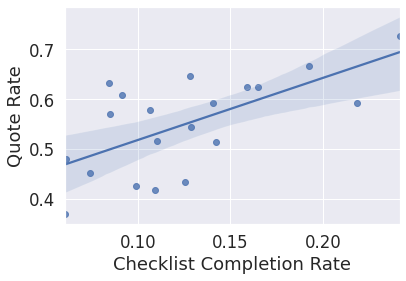

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

sns.set(font_scale=1.5)
ax = sns.regplot(x="Checklist Completion Rate", y="Quote Rate", data=df_employee_mean)
display(df_employee_mean.filter(['Checklist Completion Rate', 'Quote Rate']).corr())

p_value = stats.pearsonr(df_employee_mean['Checklist Completion Rate'], df_employee_mean['Quote Rate'])
print(" P_Value: ", p_value[1])

The p-value is well below the standard 0.05.  Additionally, the scatterplot looks good, and suggests that understanding the relationship does not require something more complex than correlation (as the relationship is roughly linear).

### What sparked your interest in insurance at this time?  vs Quote Rate

In [ ]:
p_value = stats.pearsonr(df_employee_mean['Cl2'], df_employee_mean['Quote Rate'])
print(" P_Value: ", p_value[1])

 P_Value:  0.00026983697246490203


Passed.

### What's most important to you in an insurance company? vs Quote Rate

In [ ]:
p_value = stats.pearsonr(df_employee_mean['Cl4'], df_employee_mean['Quote Rate'])
print(" P_Value: ", p_value[1])

 P_Value:  0.00486688045425293


Passed.

### What do you find most important: price, coverarge, or something else?

In [ ]:
p_value = stats.pearsonr(df_employee_mean['Cl7'], df_employee_mean['Quote Rate'])
print(" P_Value: ", p_value[1])

 P_Value:  0.0799511064303793


Failed.  However, this result can be interpreted as meaning that there is an 8% that the correlation is by chance.  Should it be excluded from a list of "good" questions to ask because of this finding? There is not a perfect answer.

Since there are two other questions that both pertain to value, it is better to leave this question out and focus on the the other two and the generalization they suggest (which includes this question and many others like it).

Perhaps when there is more data, this will shape up.

,Pc1,Quote Rate
Pc1,1.000000,0.433425
Quote Rate,0.433425,1.000000


 P_Value:  0.05624900202480291


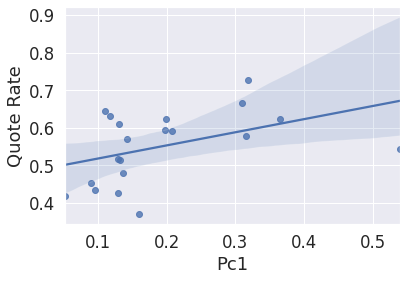

In [ ]:
ax = sns.regplot(x="Pc1", y="Quote Rate", data=df_employee_mean)
display(df_employee_mean.filter(['Pc1', 'Quote Rate']).corr())

p_value = stats.pearsonr(df_employee_mean['Pc1'], df_employee_mean['Quote Rate'])
print(" P_Value: ", p_value[1])

Again, the p-val is slightly above the typical accepted threshold.  However, this time it is only ~ 0.062 above the typically accepted threshold.  Addtionally, it seems as though the concentration of reps that got less than 0.15 of these alerts on average had a lot of variability which skewed the data.  Furthermore, there seems to be a more stable upward trend between 0.15 and 0.4.  Thus, it seems like there is a correlation there that is simply affected by the skew in the data.

Secondly, it can be interpreted as meaning that there is a ~ 5.6 percent chance that the correlation is non-existent.  Meaning that the cost-benefit would be: the gains resulting from it being true and acting multiplied times .944 vs the losses resulting from it being false times 0.056.  In this case, where there is little harm that could be done, and a great deal to gain, I'm electing to keep it in the presentation.

# Question 2: How to increase the probability of transitioning from quote to sale

This requires that only the calls where a quote was given are examined.

First, create the new dataset.

In [ ]:
df_quote = df[df['Quote Rate'] == 1].groupby('Rep ID').mean()

## Find variables with means correlated with sales rates for calls where a quote was given.

The goal is to find what a rep can regularly do to increase the probability that they will convert quotes into sales.

In [ ]:
df_quote = df[df['Quote Rate'] == 1].groupby('Rep ID').mean()
print(len(df_quote))
df_quote_corr = df_quote.corr()['Sale Rate']
display(df_quote_corr)

20


Difference                  -0.199853
Cl1                         -0.243922
Cl2                         -0.588470
Cl3                          0.003443
Cl4                         -0.641308
Cl5                         -0.163962
Cl6                          0.059198
Cl7                         -0.404964
Cl8                         -0.126325
Cl9                          0.058228
Win Rate                     0.951948
Pc1                         -0.313209
Pc2                          0.152163
Pc3                         -0.405492
Pc4                          0.389202
Pc5                         -0.437064
Pc6                         -0.203514
Pc7                         -0.298271
Pc8                         -0.066679
Quote Rate                        NaN
Sale Rate                    1.000000
Checklist Completion Rate   -0.560025
Name: Sale Rate, dtype: float64

The answer is clear.  Win rate is the dominant feature.  Though there are a few other correlations, most of them are negative and/or skewed because of their contribution to quote rates.

Luckily, they are not necessary.  the strong positive correlation between win rate and sale rate (~ 0.95) says enough by itself.  But first, it must be examined.

,Win Rate,Sale Rate
Win Rate,1.000000,0.951948
Sale Rate,0.951948,1.000000


 P_Value:  1.0890964107183973e-10


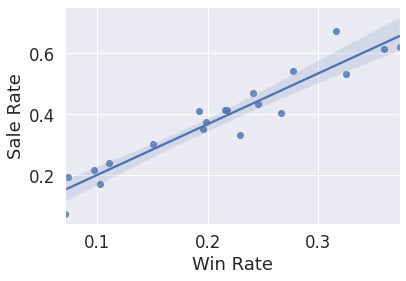

In [ ]:
ax = sns.regplot(x="Win Rate", y="Sale Rate", data=df_quote)
display(df_quote.filter(['Win Rate', 'Sale Rate']).corr())

p_value = stats.pearsonr(df_quote['Win Rate'], df_quote['Sale Rate'])
print(" P_Value: ", p_value[1])

The plot reveals an almost perfect linear relationship and the p-value is well below the standard 0.05.

This shows that the most important thing a rep can do the get sales after they have already given a quote is to ask for a sale.

The specific question is: "Please confirm for me that you want to apply for an insurance policy today with us."

## Final Question: What percentage of calls where a quote was given and a win took place led to a sale?

In [ ]:
a = df[df['Quote Rate'] == 1] # Is actually still QuoteCount from original df

display(a[a['Win Rate'] >= 1].describe()['Sale Rate'])
display(a[a['Win Rate'] == 0].describe()['Sale Rate'])

count    1467.000000
mean        0.950239
std         0.217526
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Sale Rate, dtype: float64

count    4827.000000
mean        0.272840
std         0.445466
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Sale Rate, dtype: float64

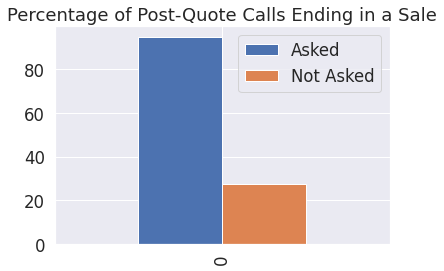

In [ ]:
vals = {"Asked": [95.0239],
            "Not Asked": [27.2840]}
comparison = pd.DataFrame(vals)
comparison.plot.bar(title='Percentage of Post-Quote Calls Ending in a Sale')

# Conclusion

There are three states to this analysis of th insurance sale call: answered call, quote given, and sale.

The goal was to glean lessons that might benefit the sales representatives.  To accomplish this, key user level rates were correlated with one another, many of which were shown to increase the likelihood of transition from one state to another.

It has been speculated that asking more questions (checklist completion rate), specifically value-based questions, and active listening will all increase representative's quote rates.  Furthermore, that the best thing a rep can do to sell those they have already quoted is to ask.  Those calls where a sale was asked for led to sales at almost three times the rates.